In [1]:
import torch

In [2]:
torch.__version__

'2.0.1+cpu'

## Tensors

### Typical tensor operations

In [4]:
tensor_array = torch.Tensor([[1,2], [4,5]])
tensor_array

tensor([[1., 2.],
        [4., 5.]])

In [5]:
# uninitialized tensor (can not be accessed)
tensor_uninitialized = torch.Tensor(3, 3)
torch.numel(tensor_uninitialized)

9

In [6]:
# initialize a tensor with torch.rand for float
tensor_initialized = torch.rand(2, 3)
tensor_initialized

tensor([[0.3708, 0.3674, 0.3466],
        [0.2919, 0.3940, 0.0095]])

In [12]:
# you can define the data type when initializing
tensor_int = torch.randn(5, 3).type(torch.IntTensor)
tensor_int

tensor([[ 0,  0,  0],
        [ 0, -1,  1],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  1]], dtype=torch.int32)

In [13]:
# define long int tensors
tensor_long = torch.LongTensor([1.0, 2.0, 3.0])
tensor_long

tensor([1, 2, 3])

In [16]:
# define byte tensors
tensor_byte = torch.ByteTensor([0, 127, 1, -5])
tensor_byte

tensor([  0, 127,   1, 251], dtype=torch.uint8)

In [17]:
# initialize tensor with 1s
tensor_ones = torch.ones(10)
tensor_ones

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
# initialize tensor with 0s
tensor_zeros = torch.zeros(10)
tensor_zeros

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
# initialize tensor with diagno matrix
tensor_eye = torch.eye(3)
tensor_eye

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [20]:
# nonzero function returns the positions of all nonzero elements
non_zero = torch.nonzero(tensor_eye)
non_zero

tensor([[0, 0],
        [1, 1],
        [2, 2]])

In [22]:
# create tensor with all 1s and the same shape as another tensor
# the output tensor has the same shape as tensor_eye with all 1s
tensor_ones_shape_eye = torch.ones_like(tensor_eye)
tensor_ones_shape_eye

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [23]:
# in place operations. all in place function has _suffix
initial_tensor = torch.rand(3, 3)
initial_tensor.fill_(3) # fill elements by value of 3

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [24]:
# out of place operation will create and return a new tensor
new_tensor = initial_tensor.add(4)
new_tensor

tensor([[7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.]])

In [25]:
initial_tensor

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [27]:
# in place add_ oprator changes the value in place
initial_tensor.add_(5)
initial_tensor

tensor([[8., 8., 8.],
        [8., 8., 8.],
        [8., 8., 8.]])

### Tensor operations with numpy

In [28]:
import numpy as np

In [29]:
numpy_arr = np.array([1, 2, 3])
numpy_arr

array([1, 2, 3])

In [30]:
# convert numpy array to tensor
tensor = torch.from_numpy(numpy_arr)
tensor

tensor([1, 2, 3], dtype=torch.int32)

In [31]:
# convert tensor to numpy array
numpy_from_tensor = tensor.numpy()
numpy_from_tensor

array([1, 2, 3])

In [32]:
# tensor and np array share the same memory
# change one will change another
numpy_arr[1] = 4
numpy_arr

array([1, 4, 3])

In [33]:
tensor

tensor([1, 4, 3], dtype=torch.int32)

### Access tensor elements


In [35]:
# by dimension indices
initial_tensor = torch.rand(2, 3)
initial_tensor

tensor([[0.1482, 0.1976, 0.5693],
        [0.2040, 0.3582, 0.7984]])

In [36]:
# select by element index
initial_tensor[0, 2] 

tensor(0.5693)

In [37]:
# select subset of elemens by slicing
initial_tensor[:, 1:]

tensor([[0.1976, 0.5693],
        [0.3582, 0.7984]])

In [41]:
# create a view that share the same memory as original tensor
# the view have differnt dimensions from the original tensor
resized_tensor = initial_tensor.view(6)
resized_tensor.shape

torch.Size([6])

In [43]:
initial_tensor[0, 2] = 0.111

In [44]:
# the resized_tensor flattern the initial_tensor to 1d
resized_tensor

tensor([0.1482, 0.1976, 0.1110, 0.2040, 0.3582, 0.7984])

In [45]:
# resize anoter view of the tensor
resized_tensor = initial_tensor.view(3, 2)
resized_tensor

tensor([[0.1482, 0.1976],
        [0.1110, 0.2040],
        [0.3582, 0.7984]])

In [46]:
# use pytorch to infer the dimension using -1
resized_matrix = initial_tensor.view(-1, 2)
resized_matrix

tensor([[0.1482, 0.1976],
        [0.1110, 0.2040],
        [0.3582, 0.7984]])

### Getting tensor dimension by size() and shape()

In [38]:
initial_tensor.size()

torch.Size([2, 3])

In [40]:
initial_tensor.shape

torch.Size([2, 3])

### Sort tensor values and sorted index

In [47]:
initial_tensor


tensor([[0.1482, 0.1976, 0.1110],
        [0.2040, 0.3582, 0.7984]])

In [48]:
# sort tensor elements by row (dim=1)
sorted_tensor, sorted_indices = torch.sort(initial_tensor)

In [49]:
sorted_tensor

tensor([[0.1110, 0.1482, 0.1976],
        [0.2040, 0.3582, 0.7984]])

In [50]:
sorted_indices

tensor([[2, 0, 1],
        [0, 1, 2]])

In [51]:
# sort tensor by columns using dim = 0
sorted_tensor, sorted_tensor_indices = torch.sort(initial_tensor, dim= 0)

In [52]:
sorted_tensor

tensor([[0.1482, 0.1976, 0.1110],
        [0.2040, 0.3582, 0.7984]])

In [53]:
sorted_tensor_indices

tensor([[0, 0, 0],
        [1, 1, 1]])

### Computation Graph
* in pytorch, it is dynamic
* everything you set up in deep learning is a computation graph
* tensorflow runs in "Define, then run" philosophy
  + you first build a graph that specifies the operations and the data
  + then you run the graph by executing the graph to get the final result
* pytorch follows the "define by run"
  + when building the graph, it allows you to run the graph
  + build and execute the graph in one go - execute as you build
*   

### Summary of Pytorch
* PyTorch is a deep learning framework
* More tightly integrated wit Python than Tensorflow
* Can use other python libraries, debugger
* Supports dynamic computation graphs, update the graph for each epoch
* Uses a forward pass for prediction, backward pass to update weights

## Simple Neural Networks

### Autograd
* Pytorch uses the Autograd library for backprogagation during training
* Autograd relies on reverse-mode automatic differentiation
* Conceptually similar to autodiff in TensorFlow
* NLL as loss function and LogSoftMax as output layer

### Metric used to train model
* Mean square Error (MSE) is the metric to be minimized during training of regression model
* Mean square error more specificall is Mean Square Error of Loss, where Loss is the difference between predicted and actural

### Calculate Gradients
* Symbolic differentiation
  + conceptually simple but hard to implement
* numeric differentiation
  + easy to implement but won't scale
* automatic differentiation
  + conceptually difficult but easy to implement
  + Pytorch, TensorFlow and other packages rely on automatic differentiation
  + relies on a mathematical trick based on Taylor's Series Expansion that allows fast approximation of gradients 

### Autograd
* the PyTorch package for calculating gradients for back progagation
* Autograd is a core package for automatic differentiation
* It remembers all executed operations in the forward phase and replays them in the backward phase

#### Properties of tensors
* every tensor has requires_grad property to define if the tensor will be tracked for backpropagation
* you set requires_grad by requires_grad_() function
* every tensor has grad property, which is a tensor that accumulates the gradient of the computations w.r.t this tensor after the backeward pass
* every tensor has grad_fn, that defines the gradient function
* both grad and grad_fn will be None until you calculate the backward gradient in a graph
* If the tensors in the computation have requires_grad = True the computed output will be true as well
* to stop autograd from tracking history on newly created tensors, use with torch.no_grad(): context manager
  + tensors created in this context manager will not track its grad property, and requires_grad is False

In [97]:
# demo code of autograd

tensor = torch.Tensor([[3, 4],
                       [7, 5]])
tensor

tensor([[3., 4.],
        [7., 5.]])

In [98]:
# requires_grad defines if the computation by this
# tensor will be tracked by autograd package
tensor.requires_grad

False

In [99]:
# to set requires_grad to true so that the calculation
# can be tracked for gradient calculaton, use requrires_grad_()
tensor.requires_grad_()
tensor.requires_grad

True

In [100]:
print(tensor.grad)

None


In [101]:
print(tensor.grad_fn)

None


In [102]:
out = (tensor * tensor).mean()

In [103]:
out.requires_grad

True

In [104]:
print(out.grad)

None


C:\Users\HuangY07\AppData\Local\Temp\1\ipykernel_24636\4162821179.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:491.)
  print(out.grad)


In [105]:
print(tensor.grad)

None


In [106]:
# we have a gradient function associated with the out tensor
# becuase out is the result of a computation
print(out.grad_fn)

In [107]:
# if we calculate the backward path of out
# we will have its grad tensor to store the accumulated backward grad
# whenever we calculate out.backward, all tensors on its path will have grad calculated
out.backward()
print(tensor.grad)
print(out.grad)

tensor([[1.5000, 2.0000],
        [3.5000, 2.5000]])
None


C:\Users\HuangY07\AppData\Local\Temp\1\ipykernel_24636\3721122271.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:491.)
  print(out.grad)


In [108]:
print(tensor.grad)

tensor([[1.5000, 2.0000],
        [3.5000, 2.5000]])


In [109]:
# since tensor has requires_grad as true, any computed output will have requires_grad as true
new_tensor = tensor * tensor
print(new_tensor.requires_grad)

True


In [112]:
with torch.no_grad():
    # since new_tensor is created in the context manager, its grad will not be tracked
    new_tensor = tensor * tensor
    print(f'new_tensor = {new_tensor}')
    print(f'requires_grad for tensor = {tensor.requires_grad}')
    print(f'requires_grad for new_tensor = {new_tensor.requires_grad}')
    

new_tensor = tensor([[ 9., 16.],
        [49., 25.]])
requires_grad for tensor = True
requires_grad for new_tensor = False


### Reverse auto-differentiation
* back progagation is implemented using a technique called reverse auto-differentiation
  + calcualte gradients used to update the model parameters 
* reverse-mode auto-differentiation is used in tensorflow and pytorch
* two passes are required in each training step
  + forward step to calculate loss
  + backward step to calucate grad and update parameters

### Demonstration of Linear Model using Autograd

### Optimizer
* torch.optim contains several optimizers
  + torch.optim.Optimizer
  + torch.optim.Adadelta
  + torch.optim.Adagrad
  + torch.optim.Adam
* Basic SGD Optimizer  
  + update parameters by subtracting learning_rate * gradient
* momentum-based optimizer
  + momentum vector helps accelerate in the direction where gradient is decreasing
  + gradients at each step weighted by those in previous step for fast convergence
  
### Cross Entropy and NLL
* how well the labels of predicted and actual of samples are matched. A lower cross entropy means a better match
* we usually use log softmax as output layer, which is more stable than softmax function
* when you use softmax, you use cross-entropy as loss function. When you use log softmax, you use negative log likelihook (NLL) as loss function
* when you use softmax, you just need to add a softmax output layer. For log softmax, you may need to additional output layer (log) to the softmax layer, but in Pytorch, you can use LogSoftMax layer, which is more numerically stable than softmax + log
* Mathematically, Output layer = logsoftmax and loss = NLL is equivalent to Output layer = softmax and loss = cross entropy
* `F.log_softmax(x, dim=-1)` where dim is the dimension along which softmax will be computed, and we allow the function to infer the right dimension
* code snapet for pytorch training

```python

optimizer = optim.Adam(model.parameters())
loss_fn = nn.NLLoss()

for epoch in range(1000):
    optimizer.zero_grad()
    Ypred = model(Xtrain)
    
    loss = loss_fn(Ypred, Ytrain)
    loss.backward()
    
    optimizer.step()
    
    Ypred_test = model(Xtest)
    loss_test = loss_fn(Ypred_test, Ytest)
    
    _, pred = Ypred_test.data.max(1)
    
    accuracy = pred.eq(Ytest_.data).sum().item() / y_test.values.size
    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])
```


  

## Building an image classification model

### Convolutional neural network (CNN)
* there are two kinds of layer in CNNs
  + convolution similar to local receptive field of human eyes
  + pooling for subsampling of inputs
* kernels
  + kernel values are trained during training
  + scanning kernels across the original images generate the convolution results
  + why use kernels instead of fully connected NN
    + parameter explosion
    + for an image with 100 time 100 pixes (10,000 pixesl total) a NN with 10,000 neurons will result in interconnections of 100 million, meaning 100 million parameters to train
  + work on 2D data and focus on portions of the image each time
  + feature maps are convolutional layers generated by applying a convolution kernel to the input
  + neurons are receptors of the result of kernel scanning each specific portion of the image. They are not connected to all pixels, but are sparse neural networks. The distance between neurons is defined by the stride.
  + each convolutional layer consists of several feature maps of equal sizes but having different parameters to learn different patterns
* pooling layer  
  + abstract high level information from the input matrix
  + you define the kernel size and stride for pooling layer, and operation type (max, min, mean)
  + neurons in a pooling layer have no weights or biases. A neuron simply applies aggregation function to all inputs
  + extract higher level inforamtion and reduce memory usage during training
  + mitigate overfitting via subsampling to extract the most significant and important informaion from the input
  + make NN recognize features independent of location (location invariance)
    + allows CNN to recognize a cat in the image whether or not it is on the top or bottom of the images
* typical CNN architecture
  + typical CNN consists of alternating groups of convolutional and pooling layers
  + each convolutional layer is followered by a RELU layer before going to pooling layer
  + The input to the CNN network is the original image, and the output for each convolutional and pooling layers are also images. However, successive outputs are smaller and smaller due to pooling layers
  + at the same time, the output extract more and more features as it becomes deeper and deeper due to feature maps in the convolutional layers
  + the outputs of the entire set of layers are then fed into a regular feed-forward NN consisting of several layers of Fully connected layer followed by ReLU
  + after the feed-forward layers, we have a softmax prediction layer
  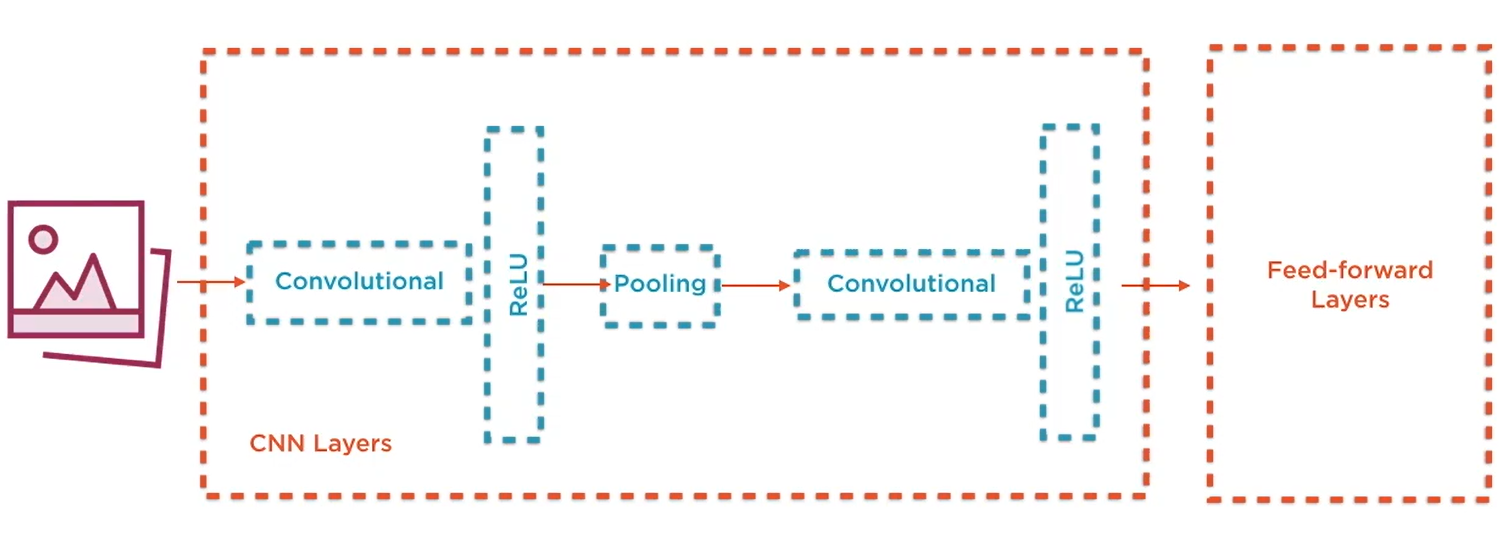
  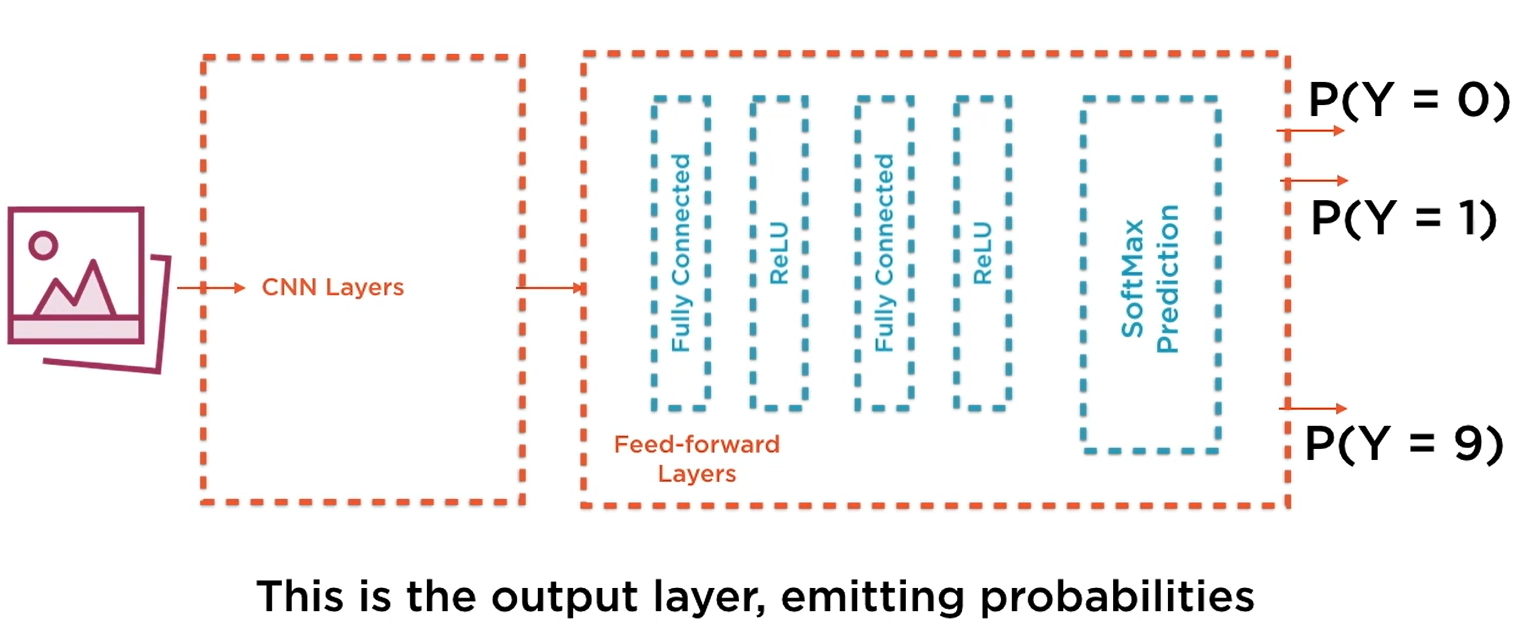
  
  
  
  

* Batch normalization
  + vanishing and exploding gradients (how to avoid)
    + set up proper initialization
    + non-saturating activation function
    + batch normalization
    + gradient clipping by setting max and min of gradients
  + back propagation fails if 
    + gradients are vanishing
      + gradient becomes zero and stops changing
    + gradients are exploding
      + gradient changes abruptly and explodes
  + batch normalization is implemented just before applying activation function
    + first, normalize inputs
      + subtract mean and divide by standard deviation across the entire batch of data      
    + second, scale and shift inputs
      + scale: multipy by constant
      + shift: add constant
  + batch normalization is supported in PyTorch and has other benefits
    + allows much larger learning rate
    + reduces overfitting
    + speeds convergence of training

### Building CNN for image classification

* zero padding and stride size
  + Narrow vs. wide convolution
    + when images pass the convolutional layer, if the feature map representaton (convolution result) is smaller than the input, it is a narrow convolution. This is because the images only have little or no zero padding when passing through the kernel. As a result, the output feature map has a smaller size than the input matrix
    + when images pass the convolutional layer, if the feature map representaton (convolution result) is larger than the input, it is a wide convolution. This is because the images have a lot of zero padding when passing through the kernel. As a result, the output feature map has a larger size than the input matrix
  + with zero-padding, every element of matrix will be passed into filter
  + you want to use zero padding if you have important features located at the edges of the input images
  
  + strid size defines how much you want your kernel to move in horizonal and vertical directions
    + you can specify the horizontal and vertical strides separately. The default values for both are 1

* activation functions
  + each neuron only applies two somple functions to its input, the Affine transformation and activation function
  + affine transformation alone can only learn linear retlationships between inputs and outputs
  + the combination of the affine transformation and the activation function can learn any arbitrary relationship
  + each activation function contains an activation region with a slope. Nerons with activation functions that operate in this region are active neurons that are learning from the data.   
  
* feature map size calculations
  + how to calculate feature map size  
  + `(W-K+2P)/S + 1`
    + W: width/height of the input image
    + K: kernel size
    + P: zero paddings
    + S: stride
    
### define input size in CNN
* `in_size` is the number of channels (1 if gray and 3 if color images). The features in each channel are defined as height and width for each image. The width and height will not be used when building NN
* `hid1_size` and `hid2_size` defines the depth / feature map size of each convolutional layer
* `out_size` is the size of the output. For number recoginition, it is 10 since we use a softmax to find the prob. for each number.
* `k_conv_size` is the kernel size
* to define convolutional layer, use `nn.Conv2d(in_size, hid1_size, k_conv_size)`
* to define batch normalization layer, use `nn.BatchNorm2d(hid1_size)` where hid1_size is the size of the feature map that will be sent to activation function
  + batch normalization zero-center and normalize the output of each layer before activations
  + allows the model to learn the optimal scale and mean of the inputs for each layer
* to define the activation layer, use `nn.ReLU()`
* to define max pool layer, use `nn.MaxPool2d(kernel_size=2)
  + the default stride for pooling layer is the same as the kernel size, which is 2 in this example
* after the convolutioanl layers, pass the results to a final linear layer use `self.fc = nn.Linear(512, out_size)` where 512 is calculated from the formula based on the kernel size, input image size, padding and stride, and `out_size` is 10
* in forward function, we need to flattern the convolutional layer features to 1d array for each batch before feeding the data to the linear layer using `out = out.reshape(out.size(0), -1)` here `out.size(0)` is the batch dimension size so each batch occupies one array.
  + then you feed the flatterned array to linear layer by `out = self.fc(out)`
  + if you want to use NLL you need to conver the linear layer output by `F.log_softmax(out, dim=-1)` and set criterion = nn.NLLLoss()
* set `learing_rate` = 0.001
* set criterion = nn.CrossEntropyLoss() can be used with a softmax activation of linear layer, or can directly work with the linear layer
* set `optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)`
* set `num_epochs = 10` and `loss_values = list()`

### hpyerparameter tuning
* parameters
  + `in_size = 1`
  + `hid1_size` = 16 by increasing or decreasing these numbers
  + `hid2_size` = 32
  + `learning_rate` = 0.001
  + `k_conv_size` = 5
  + activation function

### Preprocessing images to use in ML models
* images are in 4 dimension for ML models, batch, height, width, and channel.
* uniform aspect ratio
  + the ratio of width to height of the image
  + most models assume square shape
  + you can crop images to be square if the original images are not
    + usually, center of image is the most important, so we usually using center crop 
    + this makes aspect ratio constant
* uniform size
  + all images in the data in the same size (height and width)
  + need to rescaling the image size to accomodate CNN feature maps
* mean and perturbed images
  + sometimes you need perturb your image, or calculate the mean of the input image
  + mean image: average pixel across entire training dataset, which may help to find the patterns of the iamges. For example, faces are usually in the center
  + perturbed image: intentionally distort pixels by varing them from mean image to prevent CNN from only focusing on center
* normalized image inputs
  + the model will train faster using normalized input images
  + normalize each pixel by subtracting mean and then divide by standard deviation to ensure each pixel has similar data distribution
  + after normalization, you may rescale your pixel values to be in the 0-1 range
* Dimensionality reduction  
  + reduce the RGB data from 3 channels to grayscale with only 1 channel to train models faster
  + help to extract the latent significant features so that models don't need to handle with irrelavant features
  
* Data augmentation
  + pertubed images are a form of data augmentation
  + scaling, rotation, affine transforms
  + makes CNN training more robust and reduces risk of overfitting
  